In [73]:
#Neural Network from Scratch
#Import files first

In [74]:
from sklearn.datasets import load_digits # The MNIST data set is in scikit learn data set
from sklearn.preprocessing import StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import accuracy_score # 
import pandas as pd
import numpy as np
import numpy.random as r # We will randomly initialize our weights
import matplotlib.pyplot as plt 

In [75]:
#Formatting data

In [76]:
lol_df = pd.read_csv('games.csv')
lol_df2 = lol_df[['gameDuration', 'winner','firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills', 't1_riftHeraldKills', 't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills', 't2_riftHeraldKills']]
lol_X = lol_df2[['gameDuration', 'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills', 't1_riftHeraldKills', 't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills', 't2_riftHeraldKills']]
lol_X = np.array(lol_X)
lol_Y = lol_df2[['winner']]
lol_Y = np.array(lol_Y)

print(lol_X)
print(lol_Y)

[[1949    2    1 ...    0    1    1]
 [1851    1    1 ...    0    0    0]
 [1493    2    1 ...    0    1    0]
 ...
 [2156    2    2 ...    0    2    0]
 [1475    2    2 ...    0    1    0]
 [1445    1    1 ...    0    1    0]]
[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [0]]


In [77]:
#Scaling data

In [78]:
X_scale = StandardScaler()
lol_X_scale = X_scale.fit_transform(lol_X)

lol_X_scale[0,:] # Looking the new features after scaling

array([ 0.22780135,  1.01611295, -0.83013151, -0.45628079,  0.08734089,
       -0.77743196,  1.54200134,  1.39498948, -0.01387537,  2.78752472,
        1.33643434, -0.5796078 , -0.14231362, -0.78413297, -0.67541854,
       -0.33023792,  1.77900161])

In [79]:
#Splitting training/testing data 75/25.

In [80]:
X_train, X_test, y_train, y_test = train_test_split(lol_X_scale, lol_Y, test_size = 0.25, train_size = 0.75, random_state = 42)

In [81]:
#Setting up output layer, no need its not a multiclass classification problem.

In [82]:
#creating the actual neural network

In [83]:
#activation function

In [84]:
def f(z):
    #sigmoid
    return 1 / (1 + np.exp(-z))

def f_deriv(z):
    #sigmoid
    return f(z) * (1 - f(z))

In [85]:
#Creating and initializing W and b

In [86]:
def setup_and_init_weights(nn_structure):
    W = {} #creating a dictionary i.e. a set of key: value pairs
    b = {}
    for l in range(1, len(nn_structure)):
        W[l] = r.random_sample((nn_structure[l], nn_structure[l-1])) #Return “continuous uniform” random floats in the half-open interval [0.0, 1.0). 
        b[l] = r.random_sample((nn_structure[l],))
    return W, b

In [87]:
#Initializing▿𝑊 and▿𝑏

In [88]:
def init_tri_values(nn_structure):
    tri_W = {}
    tri_b = {}
    for l in range(1, len(nn_structure)):
        tri_W[l] = np.zeros((nn_structure[l], nn_structure[l-1]))
        tri_b[l] = np.zeros((nn_structure[l],))
    return tri_W, tri_b

In [89]:
#Feed forward

In [90]:
def feed_forward(x, W, b):
    a = {1: x} # create a dictionary for holding the a values for all levels
    z = { } # create a dictionary for holding the z values for all the layers
    for l in range(1, len(W) + 1): # for each layer
        node_in = a[l]
        z[l+1] = W[l].dot(node_in) + b[l]  # z^(l+1) = W^(l)*a^(l) + b^(l)
        a[l+1] = f(z[l+1]) # a^(l+1) = f(z^(l+1))
    return a, z

In [91]:
#Compute 𝛿

In [92]:
def calculate_out_layer_delta(y, a_out, z_out):
    # delta^(nl) = -(y_i - a_i^(nl)) * f'(z_i^(nl))
    return -(y-a_out) * f_deriv(z_out) 


def calculate_hidden_delta(delta_plus_1, w_l, z_l):
    # delta^(l) = (transpose(W^(l)) * delta^(l+1)) * f'(z^(l))
    return np.dot(np.transpose(w_l), delta_plus_1) * f_deriv(z_l)

In [93]:
#Backpropagation

In [94]:
def train_nn(nn_structure, X, y, iter_num=3000, alpha=0.25, lambda_var=0.001):
    W, b = setup_and_init_weights(nn_structure)
    cnt = 0
    N = len(y)
    avg_cost_func = []
    print('Starting gradient descent for {} iterations'.format(iter_num))
    while cnt < iter_num:
        if cnt%1000 == 0:
            print('Iteration {} of {}'.format(cnt, iter_num))
        tri_W, tri_b = init_tri_values(nn_structure)
        avg_cost = 0
        for i in range(N):
            delta = {}
            # perform the feed forward pass and return the stored a and z values, to be used in the
            # gradient descent step
            a, z = feed_forward(X[i, :], W, b)
            # loop from nl-1 to 1 backpropagating the errors
            for l in range(len(nn_structure), 0, -1):
                if l == len(nn_structure):
                    delta[l] = calculate_out_layer_delta(y[i,:], a[l], z[l])
                    avg_cost += np.linalg.norm((y[i,:]-a[l]))
                else:
                    if l > 1:
                        delta[l] = calculate_hidden_delta(delta[l+1], W[l], z[l])
                    # triW^(l) = triW^(l) + delta^(l+1) * transpose(a^(l))
                    tri_W[l] += np.dot(delta[l+1][:,np.newaxis], np.transpose(a[l][:,np.newaxis]))# np.newaxis increase the number of dimensions
                    # trib^(l) = trib^(l) + delta^(l+1)
                    tri_b[l] += delta[l+1]
        # perform the gradient descent step for the weights in each layer
        for l in range(len(nn_structure) - 1, 0, -1):
            W[l] += -alpha * (1.0/N * tri_W[l])
            #regularization
            #W[l] += -alpha * (1.0/N * tri_W[l] + lambda_var*W[l])
            b[l] += -alpha * (1.0/N * tri_b[l])
        # complete the average cost calculation
        avg_cost = 1.0/N * avg_cost
        avg_cost_func.append(avg_cost)
        cnt += 1
    return W, b, avg_cost_func


def predict_y(W, b, X, n_layers):
    N = X.shape[0]
    y = np.zeros((N,))
    for i in range(N):
        a, z = feed_forward(X[i, :], W, b)
        y[i] = np.argmax(a[n_layers])
    return y

In [95]:
#Running the neural network, plotting result and displaying accuracy.

Starting gradient descent for 3000 iterations
Iteration 0 of 3000
Iteration 1000 of 3000
Iteration 2000 of 3000


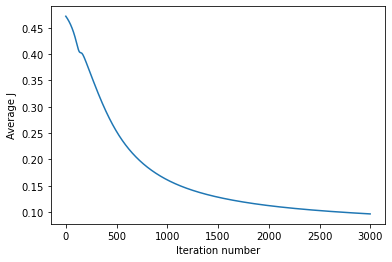

Prediction accuracy is 50.78070379864833%


In [96]:
nn_structure = [17, 10, 1]
    
# train the NN
W, b, avg_cost_func = train_nn(nn_structure, X_train, y_train, 3000)

# plot the avg_cost_func
plt.plot(avg_cost_func)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

# get the prediction accuracy and print
y_pred = predict_y(W, b, X_test, 3)
print('Prediction accuracy is {}%'.format(accuracy_score(y_test, y_pred) * 100))